In [1]:
import sys
sys.path.append("../code")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy import optimize

from scipy.io import savemat

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)

dataset = 2

import mnist_reader

X_train, y_train = mnist_reader.load_mnist('../data/mnist', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/mnist', kind='t10k')

n = 2000
#np.random.seed(6333)
#ids = np.random.choice(range(60000),n)
#X_train, y_train = X_train[ids], y_train[ids]

n = X_train.shape[0]


max_val = np.max(X_train)

X_train = X_train.astype(np.double)
X_train = X_train/max_val
print(X_train.dtype)

X_test = X_test/max_val

classes = ['0','1','2','3','4','5','6','7','8','9']

print(y_train)
print(X_train.shape, y_train.shape)



def print_stats(X):
    print('Mean:', np.mean(X))
    print('Max: ', np.max(X))
    print('Min: ', np.min(X))
    print('STD: ', np.std(X))
    
    return

print('Training Statistics')
print_stats(X_train)
print('Test Statistics')
print_stats(X_test)
    
%matplotlib notebook

%load_ext autoreload
%autoreload 2

float64
[5 0 4 ... 5 6 8]
(60000, 784) (60000,)
Training Statistics
Mean: 0.1306604762738429
Max:  1.0
Min:  0.0
STD:  0.3081078038564622
Test Statistics
Mean: 0.13251460584233699
Max:  1.0
Min:  0.0
STD:  0.3104802479305348


<IPython.core.display.Javascript object>


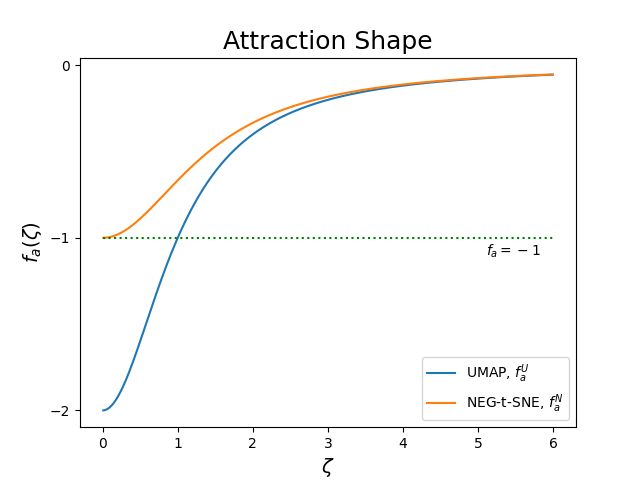

In [2]:
a = 1 #1.576943460405378
b = 1 #0.8950608781227859

umap_ar = lambda dist: -2*a*b*dist**(2*(b-1)) / (1+a*dist**(2*b))
neg_t_sne_ar = lambda dist: -2*a*b*dist**(2*(b-1)) / (2+a*dist**(2*b))


dists=np.arange(0.01,6,0.01)
umap_vals = umap_ar(dists)
neg_t_sne_vals = neg_t_sne_ar(dists)

plt.figure()
plt.plot(dists, umap_vals, label=r'UMAP, $f_a^U$')
plt.plot(dists, neg_t_sne_vals, label=r'NEG-t-SNE, $f_a^N$')
plt.xlabel(r'$\zeta$', fontsize=14)
plt.ylabel(r'$f_a(\zeta)$', fontsize=14)
#plt.plot(dists, 0.5* umap_vals - 0.1, label='UMAP 0.5')
umap_a = [-1, -1]
umap_x = [0.0, 6.0]
plt.plot(umap_x,umap_a, c='g', ls=':')
plt.text(5.1, -1.1, r'$f_a=-1$')
plt.yticks([-2,-1,0])
plt.title('Attraction Shape', fontsize=18)
plt.legend(loc='lower right')

plt.savefig('neg_fig/attraction_shape.svg')


<IPython.core.display.Javascript object>


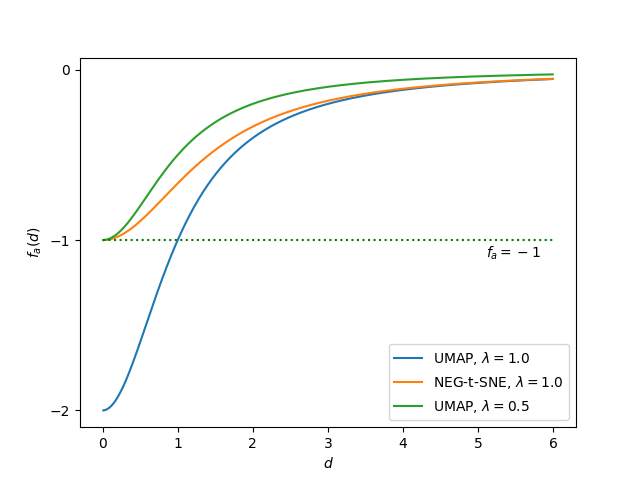

In [3]:
a = 1 #1.576943460405378
b = 1 #0.8950608781227859

umap_ar = lambda dist: -2*a*b*dist**(2*(b-1)) / (1+a*dist**(2*b))
neg_t_sne_ar = lambda dist: -2*a*b*dist**(2*(b-1)) / (2+a*dist**(2*b))


dists=np.arange(0.01,6,0.01)
umap_vals = umap_ar(dists)
neg_t_sne_vals = neg_t_sne_ar(dists)

plt.figure()
plt.plot(dists, umap_vals, label=r'UMAP, $\lambda=1.0$')
plt.plot(dists, neg_t_sne_vals, label=r'NEG-t-SNE, $\lambda=1.0$')
plt.plot(dists, 0.5*umap_vals, label=r'UMAP, $\lambda=0.5$')

plt.xlabel(r'$d$')
plt.ylabel(r'$f_a(d)$')
#plt.plot(dists, 0.5* umap_vals - 0.1, label='UMAP 0.5')
umap_a = [-1, -1]
umap_x = [0.0, 6.0]
plt.plot(umap_x,umap_a, c='g', ls=':')
plt.text(5.1, -1.1, r'$f_a=-1$')
plt.yticks([-2,-1,0])
plt.legend()


<IPython.core.display.Javascript object>


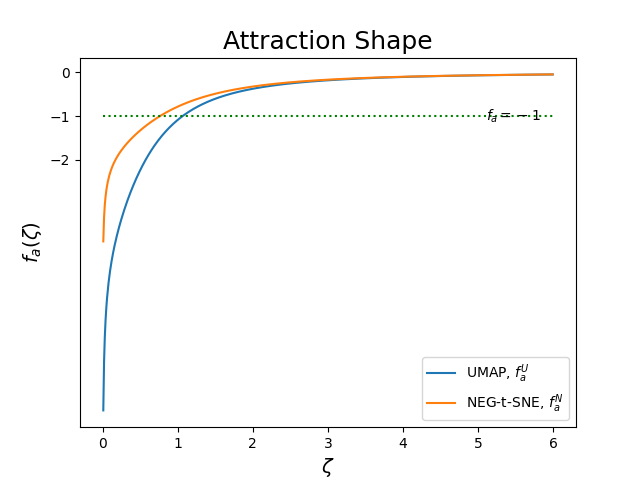

In [4]:
a = 1.58 #1.576943460405378
b = 0.89 #0.8950608781227859

umap_ar = lambda dist: -2*a*b*dist**(2*(b-1)) / (1+a*dist**(2*b))
neg_t_sne_ar = lambda dist: -2*a*b*dist**(2*(b-1)) / (2+a*dist**(2*b))


dists=np.arange(0.01,6,0.01)
umap_vals = umap_ar(dists)
neg_t_sne_vals = neg_t_sne_ar(dists)

plt.figure()
plt.plot(dists, umap_vals, label=r'UMAP, $f_a^U$')
plt.plot(dists, neg_t_sne_vals, label=r'NEG-t-SNE, $f_a^N$')
plt.xlabel(r'$\zeta$', fontsize=14)
plt.ylabel(r'$f_a(\zeta)$', fontsize=14)
#plt.plot(dists, 0.5* umap_vals - 0.1, label='UMAP 0.5')
umap_a = [-1, -1]
umap_x = [0.0, 6.0]
plt.plot(umap_x,umap_a, c='g', ls=':')
plt.text(5.1, -1.1, r'$f_a=-1$')
plt.yticks([-2,-1,0])
plt.title('Attraction Shape', fontsize=18)
plt.legend(loc='lower right')


<h1> Our Choice of Min Distance</h1>

<h1>Repulsion Force</h1>

<IPython.core.display.Javascript object>


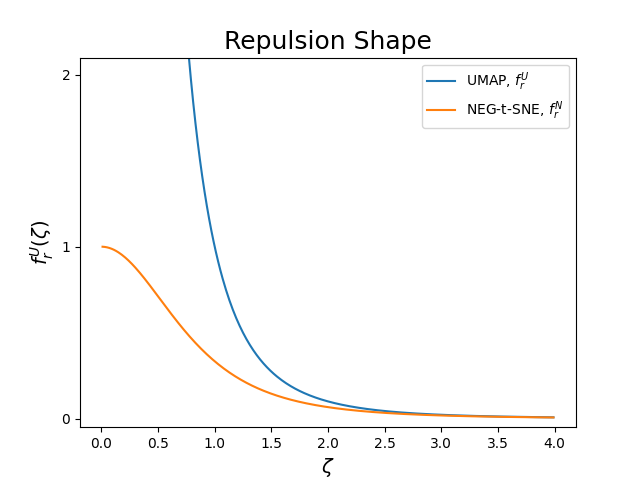

In [5]:
a = 1.#576943460405378
b = 1#0.8950608781227859

rep_coeff = lambda dist: b / (dist * (1 + a*dist**b))

def rep_ceoff_fun(dist,a,b):
    return 2*b / (dist**2 * (1 + a*dist**(2*b)))

def rep_coeff_neg(dist,a,b):
    return 2*a*b*dist**(2*(b-1)) / ( (1+a*dist**(2*b)) * (2+a*dist**(2*b)) )

dists=np.arange(0.01,4,0.01)
rcs1 = rep_ceoff_fun(dists, a, b)
rcs2 = rep_ceoff_fun(dists, a, 1.5)
rcs3 = rep_ceoff_fun(dists, a, 0.1)
rcs4 = rep_ceoff_fun(dists, a, 10)

rcs_neg = rep_coeff_neg(dists, a, b)


plt.figure()
#plt.plot(dists, rcs3, label='b=0.0001')
plt.plot(dists, rcs1, label=r'UMAP, $f_r^U$')
plt.plot(dists, rcs_neg, label=r'NEG-t-SNE, $f_r^N$')
#plt.plot(dists, rcs2, label='b=1.5')
#plt.plot(dists, rcs4, label='b=10')
plt.ylim([-0.05, 2.1])

loc_umap = 30


#plt.grid('on')
plt.xlabel(r'$\zeta$', fontsize=14)
plt.ylabel(r'$f_r^U(\zeta)$', fontsize=14)
plt.title('Repulsion Shape', fontsize=18)
plt.yticks([0,1,2])
plt.legend()
plt.savefig('neg_fig/repulsion_shape.svg')

<IPython.core.display.Javascript object>


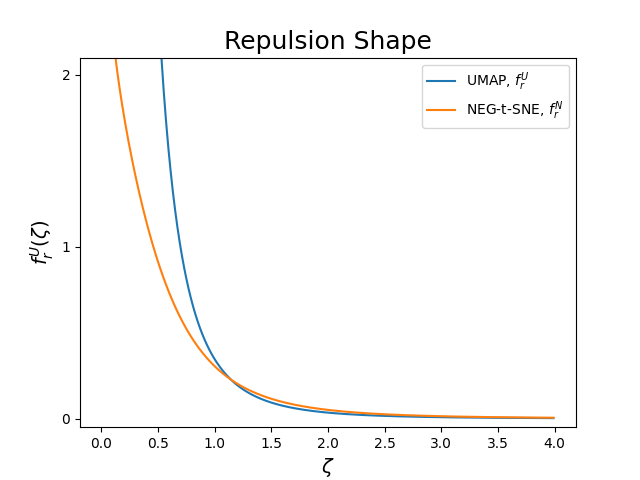

In [6]:
a = 1.578#576943460405378
b = 0.89#0.8950608781227859

rep_coeff = lambda dist: b / (dist * (1 + a*dist**b))

def rep_ceoff_fun(dist,a,b):
    return b / (dist**2 * (1 + a*dist**(2*b)))

def rep_coeff_neg(dist,a,b):
    return 2*a*b*dist**(2*(b-1)) / ( (1+a*dist**(2*b)) * (2+a*dist**(2*b)) )

dists=np.arange(0.01,4,0.01)
rcs1 = rep_ceoff_fun(dists, a, b)
rcs2 = rep_ceoff_fun(dists, a, 1.5)
rcs3 = rep_ceoff_fun(dists, a, 0.1)
rcs4 = rep_ceoff_fun(dists, a, 10)

rcs_neg = rep_coeff_neg(dists, a, b)


plt.figure()
#plt.plot(dists, rcs3, label='b=0.0001')
plt.plot(dists, rcs1, label=r'UMAP, $f_r^U$')
plt.plot(dists, rcs_neg, label=r'NEG-t-SNE, $f_r^N$')
#plt.plot(dists, rcs2, label='b=1.5')
#plt.plot(dists, rcs4, label='b=10')
plt.ylim([-0.05, 2.1])

loc_umap = 30

#plt.plot([0, 4], [loc_umap, loc_umap], c='black')
#plt.arrow(0+0.01, loc_umap, -0.01, 0, shape='full', color='black', 
#          lw=2, length_includes_head=True, head_width=0.1)
#plt.arrow(umap_point-0.01, loc_umap, 0.01, 0, shape='full', color='black', 
#          lw=0, length_includes_head=True, head_width=.1)
#plt.text(0+1.5, loc_umap+0.8, 'Expansion')


#plt.grid('on')
plt.xlabel(r'$\zeta$', fontsize=14)
plt.ylabel(r'$f_r^U(\zeta)$', fontsize=14)
plt.title('Repulsion Shape', fontsize=18)
plt.yticks([0,1,2])
plt.legend()
#plt.savefig('f_r_umap_plot.png',dpi=200)

<h1>Plot Embeddings</h1>

In [7]:
from scale_bar import add_scalebar

<IPython.core.display.Javascript object>


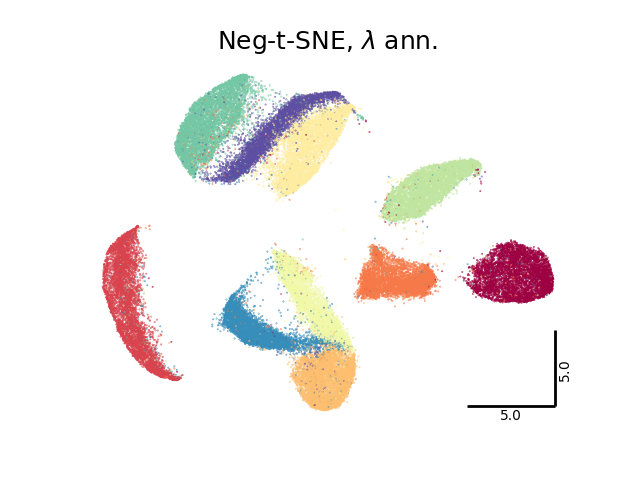

In [8]:


with open('embeddings/neg_t_sne_ann.npy', 'rb') as f:
    emb_neg_ann = np.load(f)
    
    
    
fig, ax = plt.subplots()

scatter = plt.scatter(emb_neg_ann[:,0], emb_neg_ann[:,1], c=y_train, s=0.1, alpha=1.0, cmap='Spectral')
plt.axis('off')

add_scalebar(ax, loc=4, barwidth=2)

plt.title(r'Neg-t-SNE, $\lambda$ ann.', fontsize=18)

#lgd = plt.legend(*scatter.legend_elements(),
#                 loc="upper right",
#                 fontsize=20,
#                 ncol=2,
#                 prop={'size': 9})
#for j in range(len(lgd.get_texts())):
#    lgd.get_texts()[j].set_text(classes[j])
    
plt.savefig('neg_fig/neg_tsne_annealed.png', dpi=400) #, bbox_inches='tight', pad_inches=0.4)


<IPython.core.display.Javascript object>


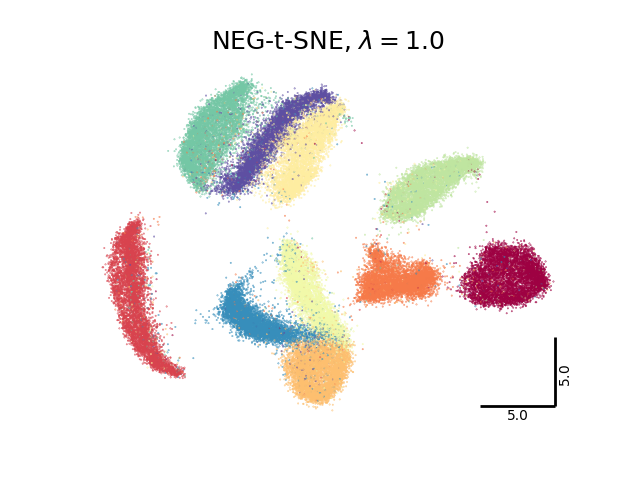

In [9]:
with open('embeddings/neg_t_sne_fixed.npy', 'rb') as f:
    emb_neg_fix = np.load(f)
    
    

fig, ax = plt.subplots()

scatter = plt.scatter(emb_neg_fix[:,0], emb_neg_fix[:,1], c=y_train, s=0.1, alpha=1.0, cmap='Spectral')
plt.axis('off')

plt.title(r'NEG-t-SNE, $\lambda=1.0$', fontsize=18)

add_scalebar(ax, loc=4, barwidth=2)
    
plt.savefig('neg_fig/neg_tsne_fixed.png', dpi=400) #, bbox_inches='tight', pad_inches=0.4)
   

<IPython.core.display.Javascript object>


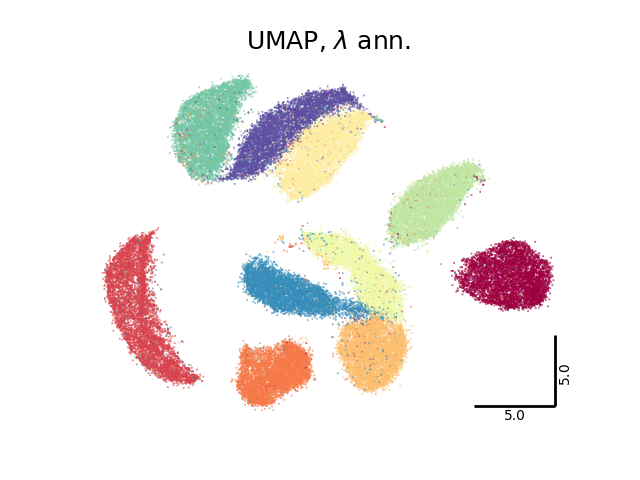

In [10]:
with open('embeddings/umap_ann.npy', 'rb') as f:
    umap_ann = np.load(f)
    
    

fig, ax = plt.subplots()

scatter = plt.scatter(umap_ann[:,0], umap_ann[:,1], c=y_train, s=0.1, alpha=1.0, cmap='Spectral')
plt.axis('off')

plt.title(r'UMAP, $\lambda$ ann.', fontsize=18)

add_scalebar(ax, loc=4, barwidth=2)
    
plt.savefig('neg_fig/umap_ann.png', dpi=400) #, bbox_inches='tight', pad_inches=0.4)
   

<IPython.core.display.Javascript object>


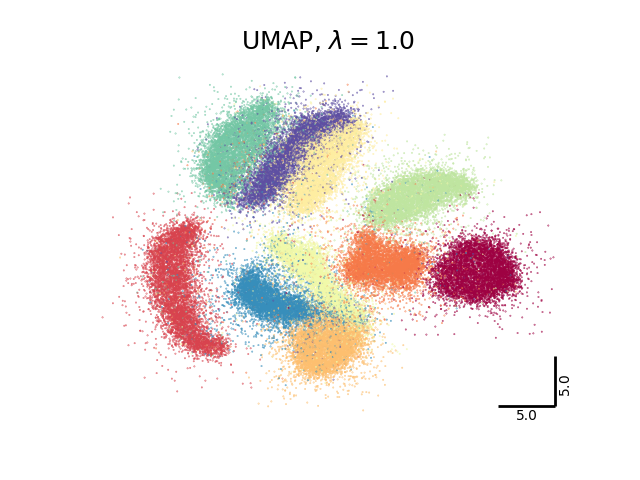

In [11]:
with open('embeddings/umap_fixed.npy', 'rb') as f:
    umap_fixed = np.load(f)

fig, ax = plt.subplots()

scatter = plt.scatter(umap_fixed[:,0], umap_fixed[:,1], c=y_train, s=0.1, alpha=1.0, cmap='Spectral')
plt.axis('off')

plt.title(r'UMAP, $\lambda=1.0$', fontsize=18)

add_scalebar(ax, loc=4, barwidth=2)
    
plt.savefig('neg_fig/umap_fixed.png', dpi=400) #, bbox_inches='tight', pad_inches=0.4)
   

<IPython.core.display.Javascript object>


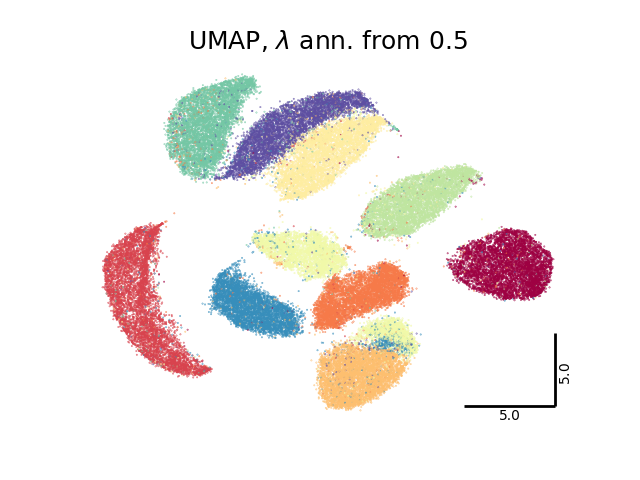

In [12]:
with open('embeddings/umap_0.5_ann.npy', 'rb') as f:
    umap_05ann = np.load(f)
    
    

fig, ax = plt.subplots()

scatter = plt.scatter(umap_05ann[:,0], umap_05ann[:,1], c=y_train, s=0.1, alpha=1.0, cmap='Spectral')
plt.axis('off')

plt.title(r'UMAP, $\lambda$ ann. from 0.5', fontsize=18)

add_scalebar(ax, loc=4, barwidth=2)
    
plt.savefig('neg_fig/umap_05ann.png', dpi=400) #, bbox_inches='tight', pad_inches=0.4)
   

<IPython.core.display.Javascript object>


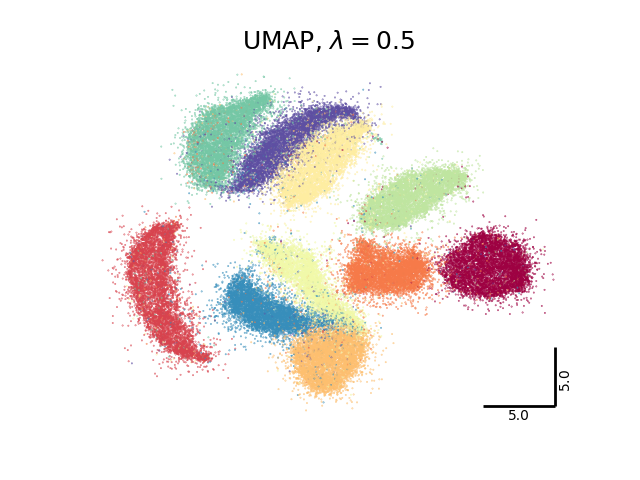

In [13]:
with open('embeddings/umap_0.5_fixed.npy', 'rb') as f:
    umap_05fixed = np.load(f)
    
    

fig, ax = plt.subplots()

scatter = plt.scatter(umap_05fixed[:,0], umap_05fixed[:,1], c=y_train, s=0.1, alpha=1.0, cmap='Spectral')
plt.axis('off')


plt.title('UMAP, $\lambda=0.5$', fontsize=18)

add_scalebar(ax, loc=4, barwidth=2)
    
plt.savefig('neg_fig/umap_05fixed.png', dpi=400) #, bbox_inches='tight', pad_inches=0.4)
   